In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


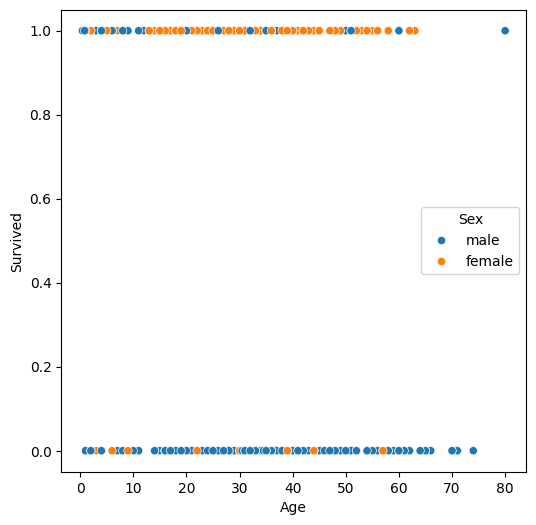

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Age', y='Survived', hue=df['Sex'])
plt.show()

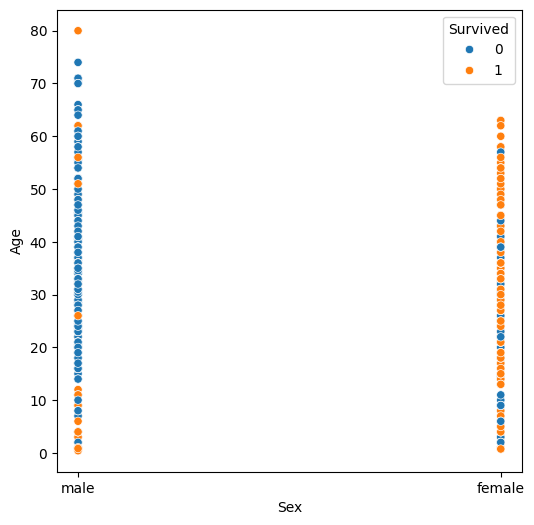

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Sex', y='Age', hue=df['Survived'])
plt.show()

In [8]:
from scipy.stats import pearsonr

In [9]:
sex_mapping = {'male':0, 'female':1}
df['Sex']=df['Sex'].map(sex_mapping)
pearsonr(df['Sex'], df['Survived'])

PearsonRResult(statistic=0.543351380657756, pvalue=1.406066130879422e-69)

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
pearsonr(df['Age'], df['Survived'])

PearsonRResult(statistic=-0.052872223928826186, pvalue=0.11477168671936547)

In [11]:
np.corrcoef(df['Sex'], df['Survived'])

array([[1.        , 0.54335138],
       [0.54335138, 1.        ]])

In [12]:
np.corrcoef(df['Sex'], df['Survived'])[0]

array([1.        , 0.54335138])

In [13]:
np.corrcoef(df['Sex'], df['Survived'])[0][1]

0.5433513806577546

In [14]:
df_titanic = df.iloc[:, 1:5]

In [15]:
df_titanic

,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,1,3,"Heikkinen, Miss. Laina",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,0,3,"Allen, Mr. William Henry",0
...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0
887,1,1,"Graham, Miss. Margaret Edith",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1
889,1,1,"Behr, Mr. Karl Howell",0


In [16]:
df_titanic.drop(['Pclass', 'Name'], axis=1, inplace=True)

In [17]:
df_titanic

,Survived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [18]:
df_titanic.corr(method='pearson')

,Survived,Sex
Survived,1.000000,0.543351
Sex,0.543351,1.000000


In [19]:
df_titanic.corr(method='pearson').values[0][1]

0.5433513806577549

In [20]:
df_new=df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


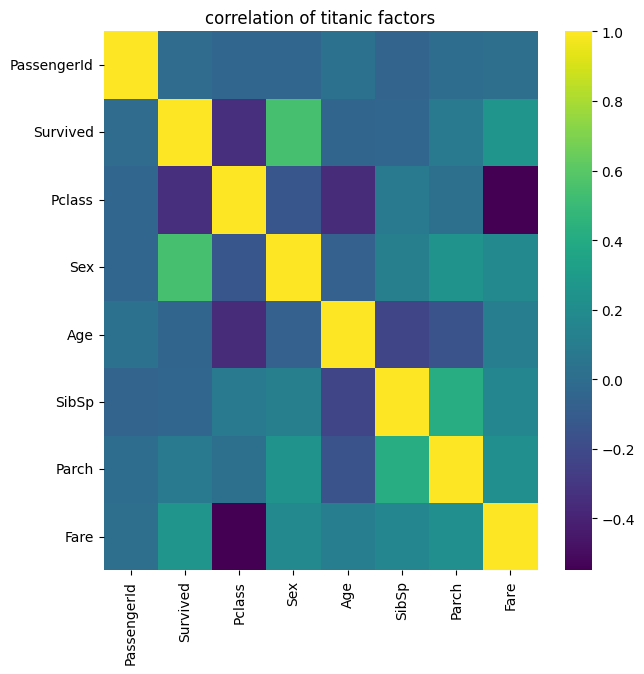

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(method='pearson'), cmap='viridis')
plt.title('correlation of titanic factors')
plt.show()

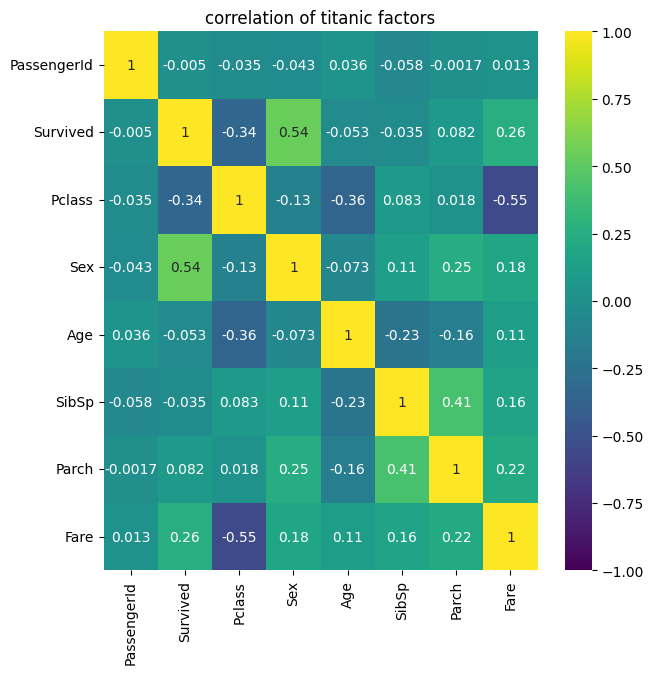

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('correlation of titanic factors')
plt.show()

In [39]:
X=df.iloc[:, 2:].values
y=df.iloc[:, 1].values

In [40]:
X

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    , 24.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [41]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,24.0,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train

array([[-1.54518003, -0.73334642, -0.34796059, -0.46836803, -0.46330384,
         3.8628593 ],
       [-0.35193905,  1.36361202,  0.18299558,  0.43536649,  0.7494621 ,
        -0.12705805],
       [ 0.84130192, -0.73334642, -0.72721499, -0.46836803, -0.46330384,
        -0.49844246],
       ...,
       [ 0.84130192, -0.73334642, -0.49966235, -0.46836803, -0.46330384,
        -0.50924118],
       [ 0.84130192, -0.73334642, -0.80306587, -0.46836803, -0.46330384,
        -0.49844246],
       [ 0.84130192, -0.73334642, -0.34796059, -0.46836803, -0.46330384,
        -0.4901108 ]])

In [45]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [46]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')
svc_poly=SVC(kernel='poly')
svc_rbf=SVC(kernel='rbf')

In [47]:
svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)
y_pred_linear= svc_linear.predict(X_test)
y_pred_poly= svc_poly.predict(X_test)
y_pred_rbf= svc_rbf.predict(X_test)
print(f'prediction accuracy of linear kernel is {np.mean(y_test == y_pred_linear)}')
print(f'prediction accuracy of poly kernel is {np.mean(y_test == y_pred_poly)}')
print(f'prediction accuracy of rbf kernel is {np.mean(y_test == y_pred_rbf)}')

prediction accuracy of linear kernel is 0.776536312849162
prediction accuracy of poly kernel is 0.7988826815642458
prediction accuracy of rbf kernel is 0.8379888268156425


In [49]:
svc_C1 = SVC(C=1)
svc_C8 = SVC(C=8)
svc_C10 = SVC(C=10)
svc_C1.fit(X_train, y_train)
svc_C8.fit(X_train, y_train)
svc_C10.fit(X_train, y_train)
y_pred_C1= svc_C1.predict(X_test)
y_pred_C8= svc_C8.predict(X_test)
y_pred_C10= svc_C10.predict(X_test)
print(f'prediction accuracy of C1 kernel is {np.mean(y_test == y_pred_C1)}')
print(f'prediction accuracy of C8 kernel is {np.mean(y_test == y_pred_C8)}')
print(f'prediction accuracy of C10 kernel is {np.mean(y_test == y_pred_C10)}')

prediction accuracy of C1 kernel is 0.8379888268156425
prediction accuracy of C8 kernel is 0.8379888268156425
prediction accuracy of C10 kernel is 0.8379888268156425


In [50]:
svc_gamma01 = SVC(gamma=0.1)
svc_gamma1 = SVC(gamma=1)
svc_gamma10 = SVC(gamma=10)
svc_gamma01.fit(X_train, y_train)
svc_gamma1.fit(X_train, y_train)
svc_gamma10.fit(X_train, y_train)
y_pred_gamma01= svc_gamma01.predict(X_test)
y_pred_gamma1= svc_gamma1.predict(X_test)
y_pred_gamma10= svc_gamma10.predict(X_test)
print(f'prediction accuracy of gamma01 kernel is {np.mean(y_test == y_pred_gamma01)}')
print(f'prediction accuracy of gamma1 kernel is {np.mean(y_test == y_pred_gamma1)}')
print(f'prediction accuracy of gamma10 kernel is {np.mean(y_test == y_pred_gamma10)}')

prediction accuracy of gamma01 kernel is 0.8324022346368715
prediction accuracy of gamma1 kernel is 0.8435754189944135
prediction accuracy of gamma10 kernel is 0.7821229050279329


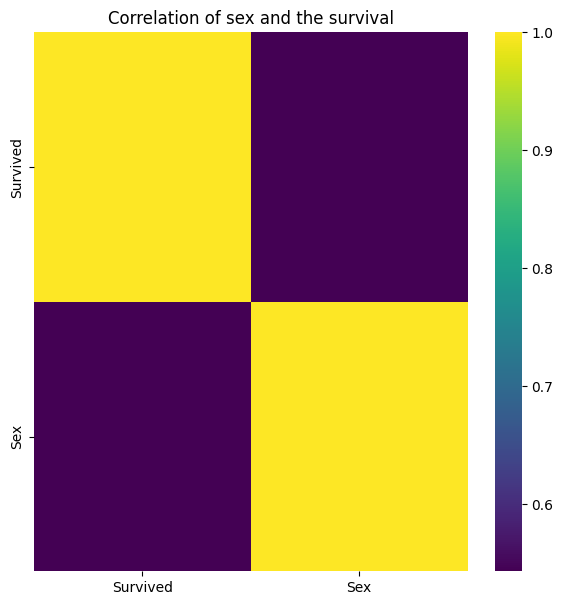

In [49]:
plt.figure(figsize=(7,7))
sns.heatmap(df_titanic.corr(method='pearson'), cmap="viridis")
plt.title('Correlation of sex and the survival')
plt.show()

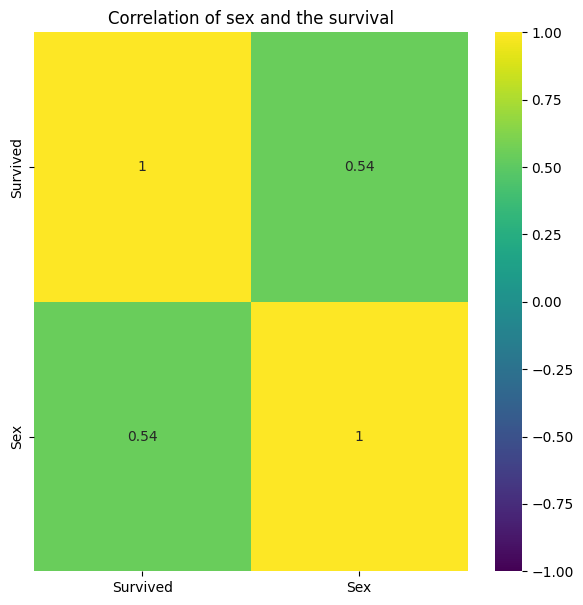

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(df_titanic.corr(method='pearson'), annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title('Correlation of sex and the survival')
plt.show()

In [57]:
X = df_titanic.iloc[:, :-1].values
y = df_titanic.iloc[:, -1].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [62]:
X_train

array([[ 1.26059149],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [ 1.26059149],
       [ 1.26059149],
       [ 1.26059149],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [ 1.26059149],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [ 1.26059149],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [-0.7932784 ],
       [ 1.26059149],
       [ 1.26059149],
       [-0.7932784 ],
       [-0.7932784 ],
       [ 1

In [63]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [64]:
from sklearn.svm import SVC

In [65]:
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

In [66]:
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [68]:
svm_linear.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [69]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [70]:
y_pred_linear= svm_linear.predict(X_test)
y_pred_poly= svm_poly.predict(X_test)
y_pred_rbf= svm_rbf.predict(X_test)

In [71]:
y_test == y_pred_linear

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,

In [72]:
np.mean(y_test == y_pred_linear)

0.7597765363128491

In [74]:
print(f'prediction accuracy of linear kernel is {np.mean(y_test == y_pred_linear)}')
print(f'prediction accuracy of poly kernel is {np.mean(y_test == y_pred_poly)}')
print(f'prediction accuracy of rbf kernel is {np.mean(y_test == y_pred_rbf)}')

prediction accuracy of linear kernel is 0.7597765363128491
prediction accuracy of poly kernel is 0.7597765363128491
prediction accuracy of rbf kernel is 0.7597765363128491


In [75]:
svm_C1 = SVC(C=1)
svm_C8 = SVC(C=8)
svm_C10 = SVC(C=10)

In [76]:
svm_C1.fit(X_train, y_train)
svm_C8.fit(X_train, y_train)
svm_C10.fit(X_train, y_train)

SVC(C=10)

In [77]:
y_pred_C1 = svm_C1.predict(X_test)
y_pred_C8 = svm_C8.predict(X_test)
y_pred_C10 = svm_C10.predict(X_test)

In [82]:
print(f'prediction accuracy of C1 is {np.mean(y_test == y_pred_C1)}')
print(f'prediction accuracy of C8 is {np.mean(y_test == y_pred_C8)}')
print(f'prediction accuracy of C10 is {np.mean(y_test == y_pred_C10)}')

prediction accuracy of C1 is 0.7597765363128491
prediction accuracy of C8 is 0.7597765363128491
prediction accuracy of C10 is 0.7597765363128491


In [83]:
svm_gamma01 = SVC(gamma=0.1)
svm_gamma1 = SVC(gamma=1)
svm_gamma10 = SVC(gamma=10)

In [84]:
svm_gamma01.fit(X_train, y_train)
svm_gamma1.fit(X_train, y_train)
svm_gamma10.fit(X_train, y_train)

SVC(gamma=10)

In [85]:
y_pred_gamma01 = svm_gamma01.predict(X_test)
y_pred_gamma1 = svm_gamma1.predict(X_test)
y_pred_gamma10 = svm_gamma10.predict(X_test)

In [86]:
print(f'prediction accuracy of gamma01 is {np.mean(y_pred_gamma01 == y_test)}')
print(f'prediction accuracy of gamma1 is {np.mean(y_pred_gamma1 == y_test)}')
print(f'prediction accuracy of gamma10 is {np.mean(y_pred_gamma10 == y_test)}')

prediction accuracy of gamma01 is 0.7597765363128491
prediction accuracy of gamma1 is 0.7597765363128491
prediction accuracy of gamma10 is 0.7597765363128491


In [ ]:
##다 똑같이 나오는데 변수가 2개밖에 없어서 그런 거 같아요...